In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score

In [2]:
bc_dataset = sklearn.datasets.load_breast_cancer() #binary-class example

In [3]:
bc_dataset_df = pd.DataFrame(bc_dataset.data, columns = bc_dataset.feature_names)
bc_dataset_df['cancer'] = bc_dataset.target

# Rename columns with underscores
for col in bc_dataset_df.columns:
    bc_dataset_df.rename(columns = {col: col.replace(' ', '_')}, inplace = True)
    
bc_dataset_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## One Feature Logistic Regression
Fit logistic regression model with just one feature - I will add more for comparison later

In [4]:
# Train-test split - start with a simple example where X only has one feature
X_one = bc_dataset_df[['mean_radius']]
y = bc_dataset_df['cancer']

X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X_one, y, test_size = .2, random_state = 1)

In [5]:
log_reg_one = LogisticRegression()
log_reg_one = log_reg_one.fit(X_train_one, y_train_one)

In [6]:
log_reg_one.predict(X_test_one)[:10] 

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [7]:
np.round(log_reg_one.predict_proba(X_test_one), 3)[:5]

array([[0.47 , 0.53 ],
       [0.147, 0.853],
       [0.12 , 0.88 ],
       [0.978, 0.022],
       [0.588, 0.412]])

In [8]:
print('Training log_reg score: ', log_reg_one.score(X_train_one, y_train_one))
print('Testing log_reg score: ', log_reg_one.score(X_test_one, y_test_one))

Training log_reg score:  0.8813186813186813
Testing log_reg score:  0.868421052631579


In [9]:
# Fit and train linear regression model for comparison
lin_reg_one = LinearRegression()
lin_reg_one.fit(X_train_one, y_train_one)

LinearRegression()

In [10]:
lin_reg_train_preds = list(lin_reg_one.predict(X_train_one))
lin_reg_test_preds = list(lin_reg_one.predict(X_test_one))
rounded_train_preds = []
rounded_test_preds = []

for pred in lin_reg_train_preds:
    pred = round(pred, 0)
    rounded_train_preds.append(pred)

for pred in lin_reg_test_preds:
    pred = round(pred, 0)
    rounded_test_preds.append(pred)

rounded_test_preds[:10]

[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]

In [11]:
print('Training log_reg score: ', log_reg_one.score(X_train_one, y_train_one))
print('Testing log_reg score: ', log_reg_one.score(X_test_one, y_test_one), '\n')

print('Training lin_reg score: ', accuracy_score(y_train_one, rounded_train_preds))
print('Testing lin_reg score: ', accuracy_score(y_test_one, rounded_test_preds))

Training log_reg score:  0.8813186813186813
Testing log_reg score:  0.868421052631579 

Training lin_reg score:  0.8681318681318682
Testing lin_reg score:  0.8421052631578947


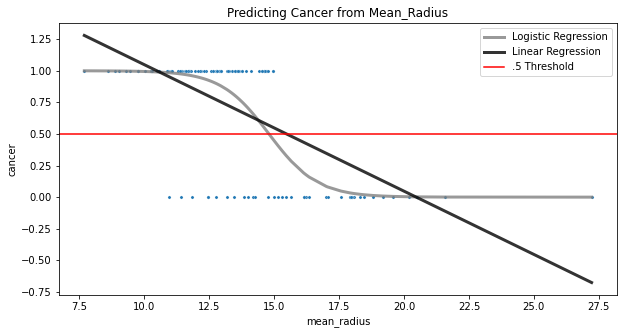

In [12]:
# Visualize linear regression vs logistic regression for the same dataset

plt.figure(figsize = (10, 5))

sns.scatterplot(x = X_test_one['mean_radius'], y = y_test_one, s = 10) #plot original data

# Log_reg outputs
plt.plot(X_test_one.sort_values('mean_radius')['mean_radius'],
         log_reg_one.predict_proba(X_test_one.sort_values('mean_radius'))[:,1],
         color = 'grey', alpha = 0.8, lw = 3)

# Lin_reg outputs 
plt.plot(X_test_one.sort_values('mean_radius')['mean_radius'],
         lin_reg_one.predict(X_test_one.sort_values('mean_radius')),
         color = 'black', alpha = 0.8, lw = 3)

# Threshold
plt.axhline(y = 0.5, color = 'r', linestyle = '-') #show where y = .5 lies on both curves

plt.xlabel('mean_radius')
plt.ylabel('cancer')
plt.title('Predicting Cancer from Mean_Radius')
plt.legend(labels = ['Logistic Regression', 'Linear Regression', '.5 Threshold']);

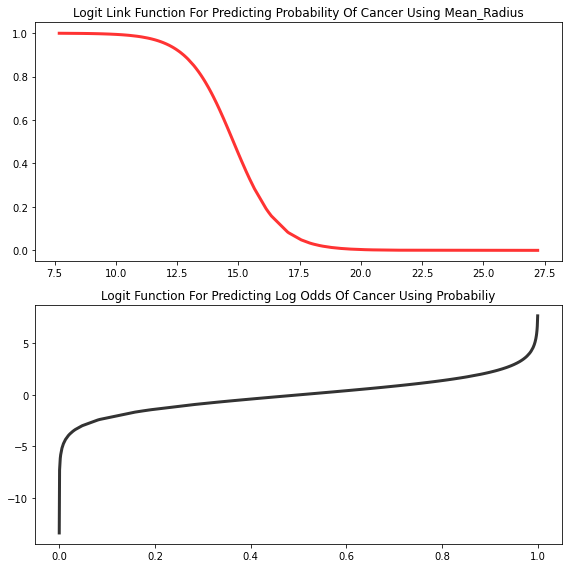

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))

# Plot the output of log_reg to compare against logit output
ax1.plot(X_test_one.sort_values('mean_radius')['mean_radius'],
         log_reg_one.predict_proba(X_test_one.sort_values('mean_radius'))[:,1],
         color = 'red', alpha = 0.8, lw = 3)

ax1.set_title('Logit Link Function For Predicting Probability Of Cancer Using Mean_Radius')

# Plot the logit function using the probabiliites from log_reg
P = log_reg_one.predict_proba(X_test_one.sort_values('mean_radius'))[:,1] #probabiliites from log_reg

ax2.plot(P, np.log(P/(1 - P)),
        color = 'black', alpha = 0.8, lw = 3)
ax2.set_title('Logit Function For Predicting Log Odds Of Cancer Using Probabiliy')

fig.tight_layout();

## Multi-Feature Logistic Regression
Fit a logistic regression model with two and three features to explore the effects of adding features on a sigmoid

In [14]:
# Train-test split - two features
X_two = bc_dataset_df[['mean_radius', 'mean_texture']]

X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two, y, test_size = .2, random_state = 1)

In [15]:
log_reg_two = LogisticRegression()
log_reg_two.fit(X_train_two, y_train_two)

LogisticRegression()

In [16]:
print('Training log_reg score: ', log_reg_two.score(X_train_two, y_train_two))
print('Testing log_reg score: ', log_reg_two.score(X_test_two, y_test_two))

Training log_reg score:  0.8989010989010989
Testing log_reg score:  0.8596491228070176


In [17]:
# Train-test split - three features
X_three = bc_dataset_df[['mean_radius', 'mean_texture', 'mean_perimeter']]

X_train_three, X_test_three, y_train_three, y_test_three = train_test_split(X_three, y, test_size = .2, random_state = 1)

In [18]:
log_reg_three = LogisticRegression()
log_reg_three.fit(X_train_three, y_train_three)

LogisticRegression()

In [19]:
print('Training log_reg score: ', log_reg_three.score(X_train_three, y_train_three))
print('Testing log_reg score: ', log_reg_three.score(X_test_three, y_test_three))

Training log_reg score:  0.9208791208791208
Testing log_reg score:  0.868421052631579


In [20]:
X_three[['mean_texture']].mean()[0]

19.28964850615117

In [21]:
# Train-test split - three features with mean_texture and mean_perimeter just taking the mean to simulate "all else nbeing held equal"
X_three_mean = bc_dataset_df[['mean_radius']].copy()

X_three_mean['mean_texture'] = X_three[['mean_texture']].mean()[0]
X_three_mean['mean_perimeter'] = X_three[['mean_perimeter']].mean()[0]
X_three_mean.head()

,mean_radius,mean_texture,mean_perimeter
0,17.99,19.289649,91.969033
1,20.57,19.289649,91.969033
2,19.69,19.289649,91.969033
3,11.42,19.289649,91.969033
4,20.29,19.289649,91.969033


In [22]:
X_train_three_mean, X_test_three_mean, y_train_three_mean, y_test_three_mean = train_test_split(X_three_mean, y, test_size = .2, random_state = 1)

In [23]:
log_reg_three_mean = LogisticRegression()
log_reg_three_mean.fit(X_train_three_mean, y_train_three_mean)

LogisticRegression()

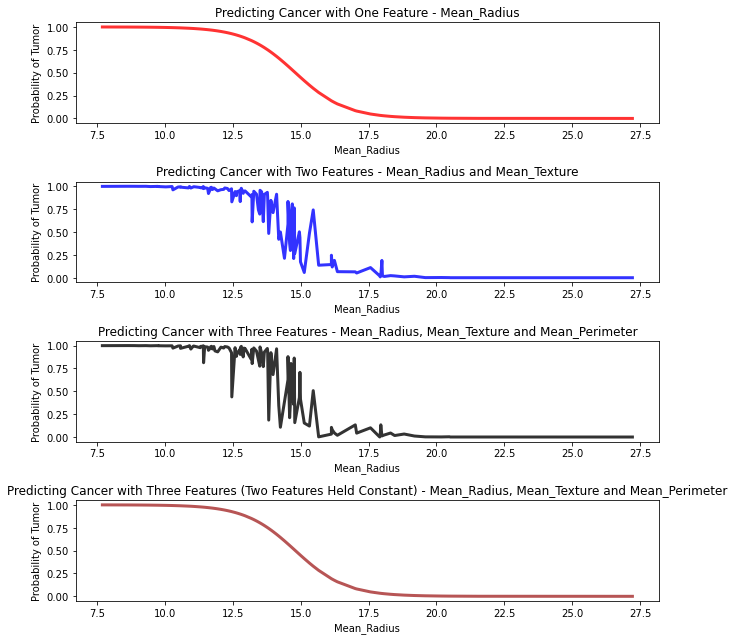

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (9, 9))

# Plot the output of log_reg_one, log_reg_two, and log_reg_three to see how adding features shifts the sigmoid
ax1.plot(X_test_one.sort_values('mean_radius')['mean_radius'],
         log_reg_one.predict_proba(X_test_one.sort_values('mean_radius'))[:,1],
         color = 'red', alpha = 0.8, lw = 3)
ax1.set_title('Predicting Cancer with One Feature - Mean_Radius')
ax1.set_xlabel('Mean_Radius')
ax1.set_ylabel('Probability of Tumor')

ax2.plot(X_test_two.sort_values('mean_radius')['mean_radius'],
         log_reg_two.predict_proba(X_test_two.sort_values('mean_radius'))[:,1],
         color = 'blue', alpha = 0.8, lw = 3)
ax2.set_title('Predicting Cancer with Two Features - Mean_Radius and Mean_Texture')
ax2.set_xlabel('Mean_Radius')
ax2.set_ylabel('Probability of Tumor')

ax3.plot(X_test_three.sort_values('mean_radius')['mean_radius'],
         log_reg_three.predict_proba(X_test_three.sort_values('mean_radius'))[:,1],
         color = 'black', alpha = 0.8, lw = 3)
ax3.set_title('Predicting Cancer with Three Features - Mean_Radius, Mean_Texture and Mean_Perimeter')
ax3.set_xlabel('Mean_Radius')
ax3.set_ylabel('Probability of Tumor')

ax4.plot(X_test_three_mean.sort_values('mean_radius')['mean_radius'],
         log_reg_three_mean.predict_proba(X_test_three_mean.sort_values('mean_radius'))[:,1],
         color = 'brown', alpha = 0.8, lw = 3)
ax4.set_title('Predicting Cancer with Three Features (Two Features Held Constant) - Mean_Radius, Mean_Texture and Mean_Perimeter')
ax4.set_xlabel('Mean_Radius')
ax4.set_ylabel('Probability of Tumor')

fig.tight_layout();

In [25]:
print('The coefficients for mean_radius, mean_texture, and mean_perimeter respectively are: \n', log_reg_three.coef_[0])

The coefficients for mean_radius, mean_texture, and mean_perimeter respectively are: 
 [ 2.67521815 -0.23217125 -0.57046239]
